In [1]:
user_data=sc.textFile('ml-100k/u.user')

In [2]:
user_data.first()

u'1|24|M|technician|85711'

In [3]:
user_fields=user_data.map(lambda line:line.split('|'))

In [4]:
num_users=user_fields.map(lambda fields:fields[0]).count()

In [5]:
num_genders=user_fields.map(lambda fields:fields[2]).distinct().count()

In [6]:
num_occupations=user_fields.map(lambda fields:fields[3]).distinct().count()

In [7]:
num_zipcodes=user_fields.map(lambda fields:fields[4]).distinct().count()

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
ages=user_fields.map(lambda x:int(x[1])).collect()

(array([ 0.00064269,  0.00192808,  0.00449886,  0.0279572 ,  0.02956393,
         0.03374144,  0.04563129,  0.02538642,  0.02088756,  0.01863813,
         0.02088756,  0.01606735,  0.0170314 ,  0.01863813,  0.00674829,
         0.00482021,  0.0054629 ,  0.00192808,  0.00128539,  0.00128539]),
 array([  7. ,  10.3,  13.6,  16.9,  20.2,  23.5,  26.8,  30.1,  33.4,
         36.7,  40. ,  43.3,  46.6,  49.9,  53.2,  56.5,  59.8,  63.1,
         66.4,  69.7,  73. ]),
 <a list of 20 Patch objects>)

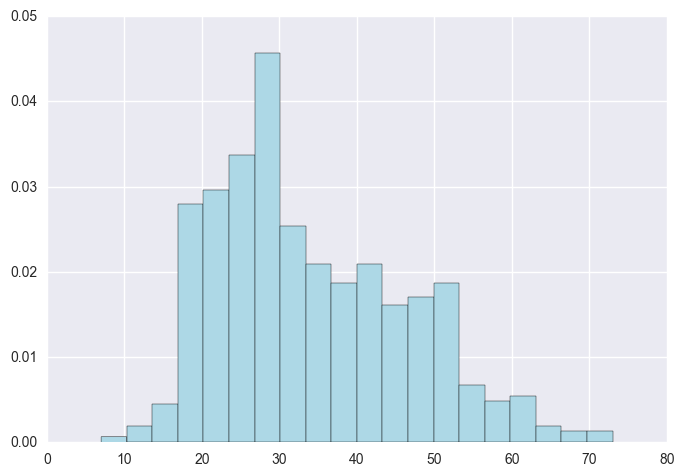

In [10]:
plt.hist(ages,bins=20,color='lightblue',normed=True)

In [11]:
count_by_occupation=user_fields.map(lambda fields:(fields[3],1)).reduceByKey(lambda x,y:x+y).collect()

In [13]:
import numpy as np

In [14]:
x_axis1=np.array([c[0] for c in count_by_occupation])

In [15]:
y_axis1=np.array([c[1] for c in count_by_occupation])

In [18]:
x_axis=x_axis1[np.argsort(y_axis1)]

In [19]:
y_axis=y_axis1[np.argsort(y_axis1)]

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5]), <a list of 21 Text xticklabel objects>)

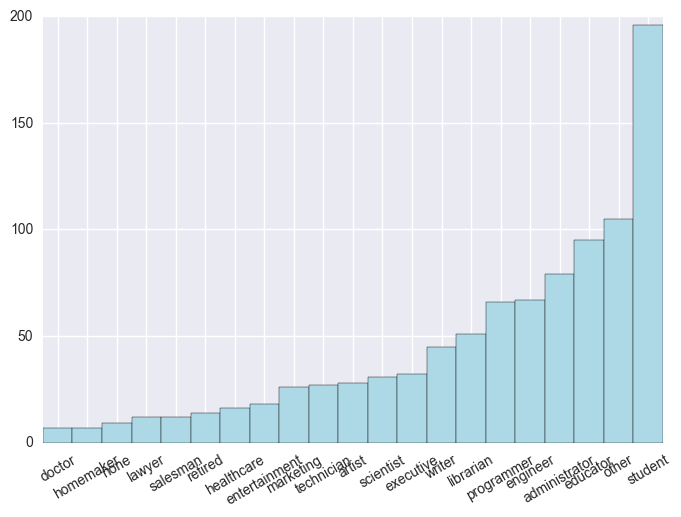

In [28]:
pos=np.arange(len(x_axis))
width=1.0
ax=plt.axes()
ax.set_xticks(pos+(width/2))
ax.set_xticklabels(x_axis)
plt.bar(pos,y_axis,width,color='lightblue')
plt.xticks(rotation=30)

In [29]:
count_by_occupation2=user_fields.map(lambda fields:fields[3]).countByValue()

In [31]:
dict(count_by_occupation2)

{u'administrator': 79,
 u'artist': 28,
 u'doctor': 7,
 u'educator': 95,
 u'engineer': 67,
 u'entertainment': 18,
 u'executive': 32,
 u'healthcare': 16,
 u'homemaker': 7,
 u'lawyer': 12,
 u'librarian': 51,
 u'marketing': 26,
 u'none': 9,
 u'other': 105,
 u'programmer': 66,
 u'retired': 14,
 u'salesman': 12,
 u'scientist': 31,
 u'student': 196,
 u'technician': 27,
 u'writer': 45}

In [32]:
movie_data=sc.textFile('ml-100k/u.item')

In [33]:
movie_data.first()

u'1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0'

In [34]:
num_movies=movie_data.count()

In [36]:
movie_fields=movie_data.map(lambda lines:lines.split("|"))

In [40]:
def convert_year(x):
    try:
        return int(x[-4:])
    except:
        return 1900

In [41]:
years=movie_fields.map(lambda fields:fields[2]).map(lambda x:convert_year(x))

In [46]:
years_filtered=years.filter(lambda x:x!=1900)

In [47]:
movie_ages=years_filtered.map(lambda yr:1998-yr).countByValue()

In [48]:
values=movie_ages.values()

In [49]:
bins=movie_ages.keys()

In [ ]:
plt.hist(values,bins=bins,color)